#Task:1 Titanic Survival Prediction

##Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#streamlit ngrok packages for TSP App development
!pip install streamlit
!pip install streamlit ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.7 MB/s eta 0:00:00


#1. Data Exploration and Preprocessing

##   Step 1:  Load the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Task-1/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Step 2: Explore the Data

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.duplicated().sum()

0

In [ ]:
survived_counts = data['Survived'].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
sex_counts = data['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
p_class = data['Pclass'].value_counts()
p_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
Sibsp_counts = data['SibSp'].value_counts()
Sibsp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
Parch_counts = data['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
embarked_counts = data['Embarked'].value_counts()
embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

##Step 3: Handle Missing values

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Fill missing values in "Age" with the median.
data['Age'].fillna(data['Age'].median(), inplace=True)

#Fill missing values in 'Embarked' with the mode.
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [ ]:
# Convert 'Sex' and 'Embarked' to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C':0, 'S':1, 'Q':2})

##Step 4: Feature Engineering

In [ ]:
#Create 'FamilySize' feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
#Create 'isAlone' feature
data['isAlone'] = 1
data.loc[data['FamilySize'] > 1, 'isAlone'] = 0

##Step 5: Drop Unnecessary Columns

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
#Dataset verification
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,0,22.0,7.2500,1.0,2,0
1,1,1,1,38.0,71.2833,0.0,2,0
2,1,3,1,26.0,7.9250,1.0,1,1
3,1,1,1,35.0,53.1000,1.0,2,0
4,0,3,0,35.0,8.0500,1.0,1,1


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
isAlone       0
dtype: int64

In [3]:
#Preprocessed Dataset
data = pd.read_csv('/content/drive/MyDrive/Task-1/titanic_preprocess.csv')
data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,0,-0.565736,-0.502445,1,2,0
1,1,1,1,0.663861,0.786845,0,2,0
2,1,3,1,-0.258337,-0.488854,1,1,1
3,1,1,1,0.433312,0.420730,1,2,0
4,0,3,0,0.433312,-0.486337,1,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,-0.386671,1,1,1
887,1,1,1,-0.796286,-0.044381,1,1,1
888,0,3,1,-0.104637,-0.176263,1,4,0
889,1,1,0,-0.258337,-0.044381,0,1,1


##Step 6: Exploratory data Analysis

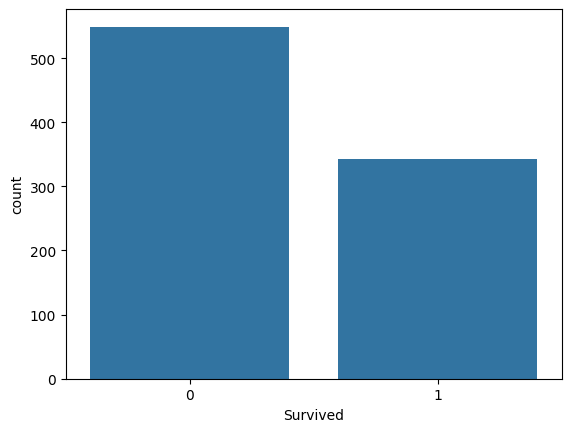

In [ ]:
# visualize the distribution of the target variable
sns.countplot(x='Survived', data=data)
plt.show()

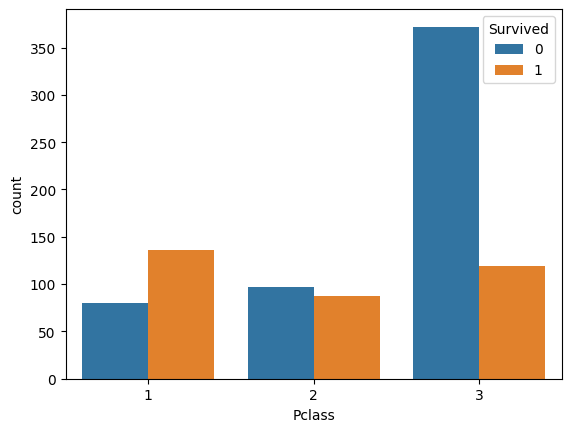

In [ ]:
# visualize 'Pclass' and it's relation to "survived"
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

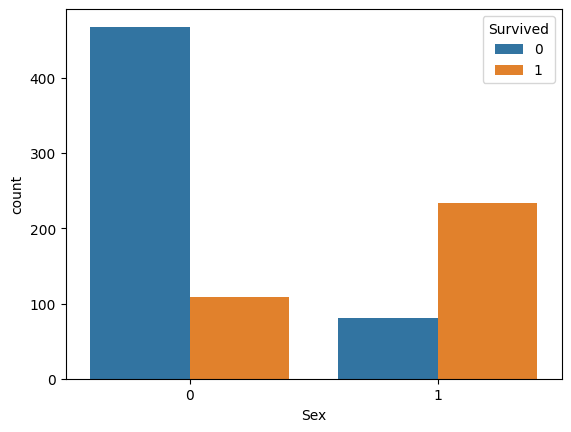

In [ ]:
#visualize 'Sex' and it's relation to "survived"
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

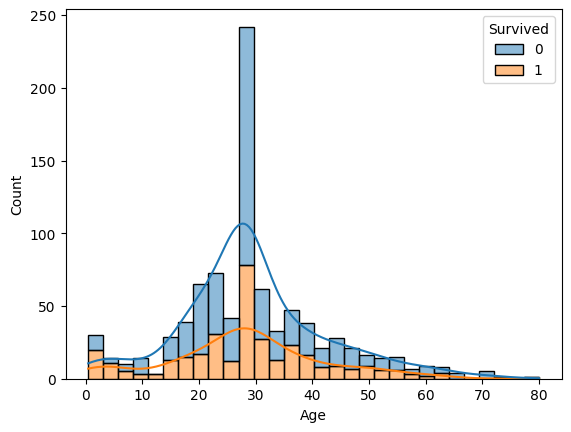

In [ ]:
#visualixe 'Age' and its relation with "survived"
sns.histplot(x='Age', hue='Survived', data=data, multiple='stack', kde=True)
plt.show()

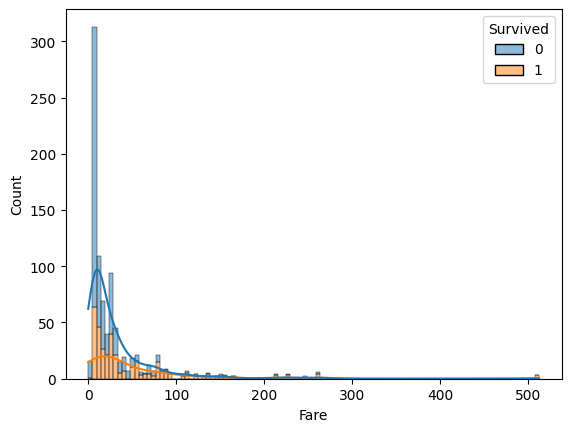

In [ ]:
#visualize 'Fare' and its relation with "survived"
sns.histplot(x='Fare', hue='Survived', data=data, multiple='stack', kde=True)
plt.show()

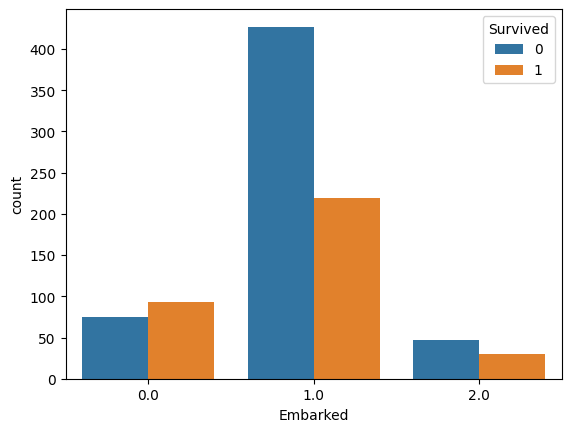

In [ ]:
#visualize 'Embarked' and it's relation to "survived"
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.show()

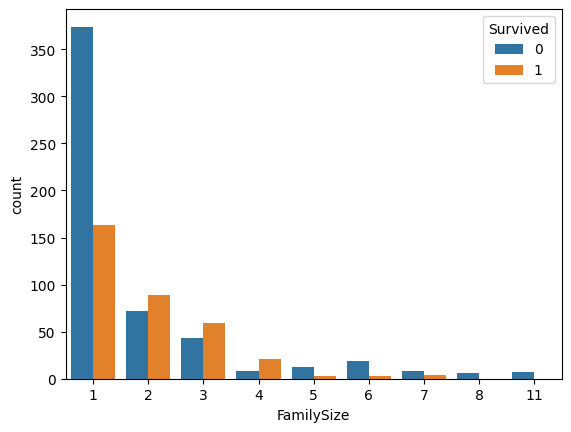

In [ ]:
#visualize 'FamilySize' and it's relation to "survived"
sns.countplot(x='FamilySize', hue='Survived', data=data)
plt.show()

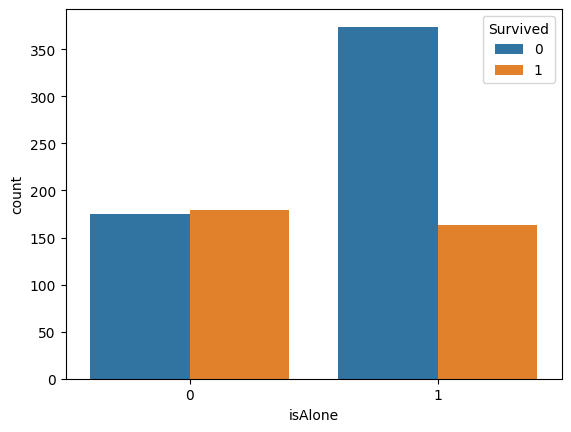

In [ ]:
#visualize 'isAlone' and it's relation to "survived"
sns.countplot(x='isAlone', hue='Survived', data=data)
plt.show()

In [ ]:
data.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
Survived,1.000000,-0.338481,0.543351,-0.064910,0.257307,-0.125953,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.339898,-0.549500,0.305762,0.065997,0.135207
Sex,0.543351,-0.131900,1.000000,-0.081163,0.182333,-0.022521,0.200988,-0.303646
Age,-0.064910,-0.339898,-0.081163,1.000000,0.096688,-0.040166,-0.245619,0.171647
Fare,0.257307,-0.549500,0.182333,0.096688,1.000000,-0.268865,0.217138,-0.271832
Embarked,-0.125953,0.305762,-0.022521,-0.040166,-0.268865,1.000000,0.003138,0.119710
FamilySize,0.016639,0.065997,0.200988,-0.245619,0.217138,0.003138,1.000000,-0.690922
isAlone,-0.203367,0.135207,-0.303646,0.171647,-0.271832,0.119710,-0.690922,1.000000


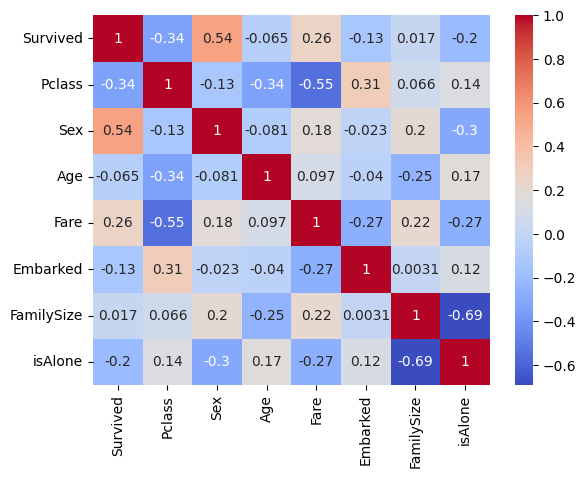

In [ ]:
#Now visualize the corelation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Step 7: Feature Scaling

In [ ]:
#Define the features to scale
feature_to_scale = ['Age', 'Fare']

#Initilize the scalar
scaler=StandardScaler()

#Fit and transform feature
data[feature_to_scale] = scaler.fit_transform(data[feature_to_scale])

In [ ]:
data.FamilySize.max()

11

In [ ]:
# data.isAlone.max()
data.isAlone.min()

0

# 2. Data Splitting

In [6]:
# Split the Data into Training and Testing sets

# Define relavant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'isAlone']
x=data[features]
y=data['Survived']

#split the data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# 3. (i)Logistic Regression Model

In [ ]:
# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# (ii) Model Evaluation

In [ ]:
# Evaluate the Logistic regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7932960893854749
Confusion Matrix:
 [[90 15]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# 4. (i) Random Forest Model

In [ ]:
#Initialize the model
rf = RandomForestClassifier()

#Train the model
rf.fit(X_train,y_train)

#predict on the test set
y_pred_rf = rf.predict(X_test)

# (ii) Model Evaluation

In [ ]:
#Random Forest Evaluation
print("Random forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))

Random forest Accuracy:  0.8212290502793296
Confusion Matrix: 
 [[90 15]
 [17 57]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#5. Save the Model

In [ ]:
import joblib

#save random forest model
joblib.dump(rf, '/content/drive/MyDrive/Task-1/final_rf_model.pkl')

['/content/drive/MyDrive/models/final_rf_model.pkl']

#6. Load the Model

In [4]:
import joblib

#load the model
loaded_model = joblib.load('/content/drive/MyDrive/Task-1/final_rf_model.pkl')

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

#Elevate performance again
print("Accuracy of the Model", accuracy_score(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print("Classification Report: \n", classification_report(y_test, predictions))

Accuracy of the Model 0.8324022346368715
Confusion Matrix: 
 [[89 16]
 [14 60]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [9]:
# Assume new_data is a DataFrame with the same structure as your training data.
new_data = pd.DataFrame({
    'Pclass':[1],
    'Sex':[0],
    'Age':[25],
    'Fare':[7.25],
    'Embarked':[1],
    'FamilySize':[1],
    'isAlone':[1]

})

# Predict the survival
survival_prediction = loaded_model.predict(new_data)
print("Survival prediction for new Data: ", survival_prediction)

Survival prediction for new Data:  [1]


# Survival Prediction through Streamlit app

In [10]:
!streamlit run /content/drive/MyDrive/Task-1/titanic_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.127.2.12:8501

  Stopping...
  Stopping...


In [11]:
!nohup streamlit run /content/drive/MyDrive/Task-1/titanic_app.py &

nohup: appending output to 'nohup.out'


In [12]:
!pip install pyngrok
!ngrok authtoken 2hjASywGj0B5ckSjHgTu2l924pR_2YGDHVNZLGWqQ9Uzfj6KK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [13]:
import os
from pyngrok import ngrok

auth_token = "2hjASywGj0B5ckSjHgTu2l924pR_2YGDHVNZLGWqQ9Uzfj6KK"
ngrok.set_auth_token(auth_token)

In [16]:
# Define the Streamlit app code as a multi-line string
app_code = """
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model_path = '/content/drive/MyDrive/Task-1/final_rf_model.pkl'
model = joblib.load(model_path)

# Title of the app
st.title('Titanic Survival Prediction')

# Input features for prediction
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', [0, 1])
age = st.slider('Age', 0, 100, 25)
fare = st.slider('Fare', 0.0, 500.0, 30.0)
embarked = st.selectbox('Embarked', [0, 1, 2])
family_size = st.slider('FamilySize', 1, 11, 1)
is_alone = st.selectbox('isAlone', [0, 1])

# Create input DataFrame
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'Fare': [fare],
    'Embarked': [embarked],
    'FamilySize': [family_size],
    'isAlone': [is_alone]
})

# Display the input data
st.write('Input data:', input_data)

# Predict survival
prediction = model.predict(input_data)[0]

# Display prediction result
if st.button('Predict'):
    if prediction == 1:
        st.success('The passenger would have survived.')
    else:
        st.error('The passenger would not have survived.')
"""

# Save the app code to a file in Google Drive
app_file_path = '/content/drive/MyDrive/Task-1/titanic_app.py'

with open(app_file_path, 'w') as f:
    f.write(app_code)

# Verify the file content
with open(app_file_path, 'r') as f:

    print(f.read())


import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model_path = '/content/drive/MyDrive/Task-1/final_rf_model.pkl'
model = joblib.load(model_path)

# Title of the app
st.title('Titanic Survival Prediction')

# Input features for prediction
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', [0, 1])
age = st.slider('Age', 0, 100, 25)
fare = st.slider('Fare', 0.0, 500.0, 30.0)
embarked = st.selectbox('Embarked', [0, 1, 2])
family_size = st.slider('FamilySize', 1, 11, 1)
is_alone = st.selectbox('isAlone', [0, 1])

# Create input DataFrame
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'Fare': [fare],
    'Embarked': [embarked],
    'FamilySize': [family_size],
    'isAlone': [is_alone]
})

# Display the input data
st.write('Input data:', input_data)

# Predict survival
prediction = model.predict(input_data)[0]

# Display prediction result
if st.button('Predict'):
    if prediction == 1:
        

# Streamlit Final App for Titanic Survival Prediction

In [17]:
from pyngrok import ngrok
import os

#Create the streamlit app via ngrok
public_url = ngrok.connect(8501)
print("Public Url: ", public_url)

Public Url:  NgrokTunnel: "https://56df-34-127-2-12.ngrok-free.app" -> "http://localhost:8501"
